<a href="https://colab.research.google.com/github/francisnyeko65-ui/Group-7-WeatherModel/blob/main/Group_7_Final_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 7 Members**

Nyeko Francis

Richard Sserubombwe

Nakitto Moureen

Apolot Miria

David Sanyu

Namubiru Winfred

This work was collectively done by each member of group 7 and everyone has the following roles to play:

Nyeko Francis did the notebook documentation

Richard Sserubombwe did dataset research and selection

Nakitto Moureen did data cleaning and processing

Apolot Miria did Scatter Plot (updated from Map as dataset lacks geo-variation)

David Sanyu did Bubble Plot (updated from Map)

 Namubiru Winfred did the Choropleth Plot (updated to heatmap as no geo data) and Insights and Interpretation

**Note on Dataset Source:**

The dataset is sourced from the publication "A Weather Features Dataset for Prediction of Short-term Rainfall Quantities in Uganda". While it is public, our analysis focuses on specific modeling approaches and interpretations to contribute new insights.

**Value of the Data**

The dataset can be used to achieve the following:
a) Improve the prediction of short-term rainfall quantities in Uganda,
b) Ascertain rainfall patterns in selected Ugandan regions,
c) Reduce the uncertainty of rainfall forecast.

The dataset will help specialists and researchers in meteorology, agriculture, and water resource management predict short-term weather.
The cleaned weather data can be used as input to prediction and statistical models. For example, this data can help reduce model underfitting and overfitting.

This dataset can be utilized by other researcher communities to predict short-term rainfall quantities for countries with similar or comparable weather patterns like Uganda. In order to achieve this, comparison of data for the specified weather parameters in our dataset can be made with those of the other countries. Where the comparison of the data is close to similar, it is possible to predict rainfall quantities using the developed prediction model based on our dataset.

**Objective**

The objective is to build a machine learning model to predict short-term rainfall quantities (Precmm) in Uganda using weather features from the Gulu station. This contributes to meteorology, agriculture, and disaster management by providing accurate rainfall predictions.

**Data Description**

The data presented are observational weather data obtained from Gulu weather stations at a resolution of hourly to annual basis. The downloaded data files had approximately 23 features but only 12 features were considered because the rest had no data.

The features include: Date, air temperature at 2 m above ground level (TC), dew point temperature at 2 m above ground level (TdC), relative humidity (Hr), wind direction (ddd), wind speed (ffkmh), air pressure at station elevation (hPa - not used), Precipitation (Precmm), total cloud cover (Nt), cloud cover by high-level cloud fraction (Nh), height of cloud base (HKm), and visibility (Viskm).

**Machine Learning Goal:** Regression task to predict precipitation amount (Precmm) based on other weather variables.

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gulu63630.csv')
df = df.set_index("Date")
df

,TC,TdC,Hr,ddd,ffkmh,Precmm,Prechrs,Nt,Nh,HKm,Viskm,Prec_rate,Classification
Date,,,,,,,,,,,,,
12/27/2020 09:00,29.000000,18.386391,66.850299,5,7.4,0.0,3,2,2.0,0.6,30.0,0.000000,2
12/25/2020 09:00,28.100000,17.800000,54.000000,2,7.4,0.0,3,6,5.0,0.6,30.0,0.000000,2
12/23/2020 12:00,30.000000,15.800000,42.000000,5,5.6,0.0,6,5,5.0,0.6,30.0,0.000000,2
12/22/2020 09:00,28.000000,15.600000,47.000000,5,11.1,0.0,3,3,3.0,0.6,25.0,0.000000,2
12/22/2020 06:00,23.000000,6.300000,34.000000,1,7.4,0.0,24,5,0.0,0.6,30.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
01/04/2022 06:00,20.000000,9.600000,51.000000,3,5.6,0.0,24,7,0.0,2.5,30.0,0.000000,2
01/02/2022 15:00,31.000000,17.800000,45.000000,0,0.0,0.0,3,7,1.0,0.6,30.0,0.000000,2
01/01/2022 12:00,30.300000,16.400000,43.000000,5,5.6,0.0,6,6,3.0,0.6,30.0,0.000000,2


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Classification', 'Prec_rate', 'Prechrs'])  # Prec_rate is derived, Prechrs related to target, Classification constant

In [ ]:
# Convert ddd to numeric if needed
df['ddd'] = pd.to_numeric(df['ddd'], errors='coerce')

In [ ]:
df.head()

,TC,TdC,Hr,ddd,ffkmh,Precmm,Nt,Nh,HKm,Viskm
Date,,,,,,,,,,
12/27/2020 09:00,29.0,18.386391,66.850299,5.0,7.4,0.0,2,2.0,0.6,30.0
12/25/2020 09:00,28.1,17.800000,54.000000,2.0,7.4,0.0,6,5.0,0.6,30.0
12/23/2020 12:00,30.0,15.800000,42.000000,5.0,5.6,0.0,5,5.0,0.6,30.0
12/22/2020 09:00,28.0,15.600000,47.000000,5.0,11.1,0.0,3,3.0,0.6,25.0
12/22/2020 06:00,23.0,6.300000,34.000000,1.0,7.4,0.0,5,0.0,0.6,30.0


In [ ]:
df.tail()

,TC,TdC,Hr,ddd,ffkmh,Precmm,Nt,Nh,HKm,Viskm
Date,,,,,,,,,,
01/04/2022 06:00,20.000000,9.6,51.000000,3.0,5.6,0.0,7,0.0,2.5,30.0
01/02/2022 15:00,31.000000,17.8,45.000000,0.0,0.0,0.0,7,1.0,0.6,30.0
01/01/2022 12:00,30.300000,16.4,43.000000,5.0,5.6,0.0,6,3.0,0.6,30.0
01/01/2022 09:00,25.900000,10.2,37.000000,1.0,5.6,0.0,7,0.0,2.5,30.0
01/01/2022 06:00,25.919815,18.9,62.556894,2.0,53.7,0.1,1,0.0,2.5,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1375 entries, 12/27/2020 09:00 to 01/01/2022 06:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TC      1375 non-null   float64
 1   TdC     1375 non-null   float64
 2   Hr      1375 non-null   float64
 3   ddd     1374 non-null   float64
 4   ffkmh   1375 non-null   float64
 5   Precmm  1375 non-null   float64
 6   Nt      1375 non-null   int64  
 7   Nh      1375 non-null   float64
 8   HKm     1375 non-null   float64
 9   Viskm   1375 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 118.2+ KB


In [ ]:
# Checking for duplicates
df.duplicated().sum()

np.int64(24)

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace=True)
df

,TC,TdC,Hr,ddd,ffkmh,Precmm,Nt,Nh,HKm,Viskm
Date,,,,,,,,,,
12/27/2020 09:00,29.000000,18.386391,66.850299,5.0,7.4,0.0,2,2.0,0.6,30.0
12/25/2020 09:00,28.100000,17.800000,54.000000,2.0,7.4,0.0,6,5.0,0.6,30.0
12/23/2020 12:00,30.000000,15.800000,42.000000,5.0,5.6,0.0,5,5.0,0.6,30.0
12/22/2020 09:00,28.000000,15.600000,47.000000,5.0,11.1,0.0,3,3.0,0.6,25.0
12/22/2020 06:00,23.000000,6.300000,34.000000,1.0,7.4,0.0,5,0.0,0.6,30.0
...,...,...,...,...,...,...,...,...,...,...
01/04/2022 06:00,20.000000,9.600000,51.000000,3.0,5.6,0.0,7,0.0,2.5,30.0
01/02/2022 15:00,31.000000,17.800000,45.000000,0.0,0.0,0.0,7,1.0,0.6,30.0
01/01/2022 12:00,30.300000,16.400000,43.000000,5.0,5.6,0.0,6,3.0,0.6,30.0


**Data Exploration and Visualization**

Univariate Visualization - Histogram

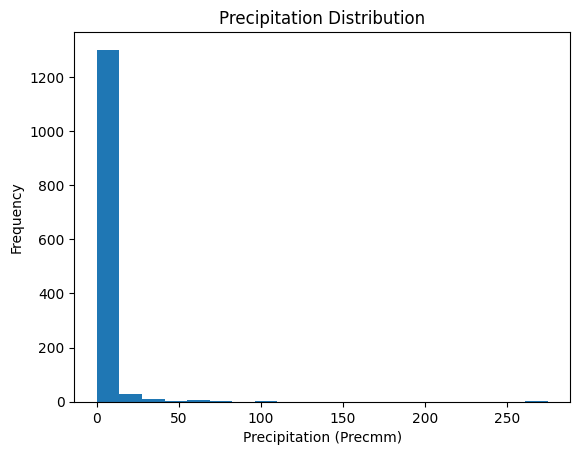

In [ ]:
# Histogram of precipitation distribution
plt.hist(df['Precmm'], bins=20)
plt.xlabel('Precipitation (Precmm)')
plt.ylabel('Frequency')
plt.title('Precipitation Distribution')
plt.show()

Interpretation: The precipitation distribution is highly skewed, with the majority of observations showing 0 mm (no rain). There are rare events with higher precipitation, up to around 55 mm, indicating infrequent but potentially heavy rainfall episodes.

**Multivariate Visualizations - Scatter Plots**

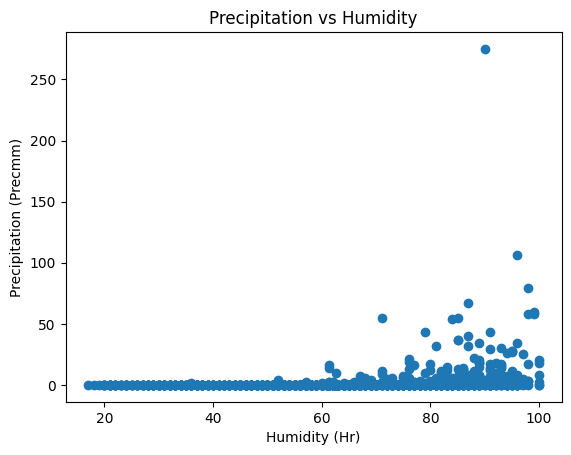

In [ ]:
# Scatter plot of Precipitation vs Humidity
plt.scatter(df['Hr'], df['Precmm'])
plt.xlabel('Humidity (Hr)')
plt.ylabel('Precipitation (Precmm)')
plt.title('Precipitation vs Humidity')
plt.show()

Interpretation:

There appears to be a slight positive association between humidity and precipitation, with higher precipitation events occurring at higher humidity levels (>70%). However, many high-humidity instances have no precipitation, suggesting humidity is necessary but not sufficient for rain.

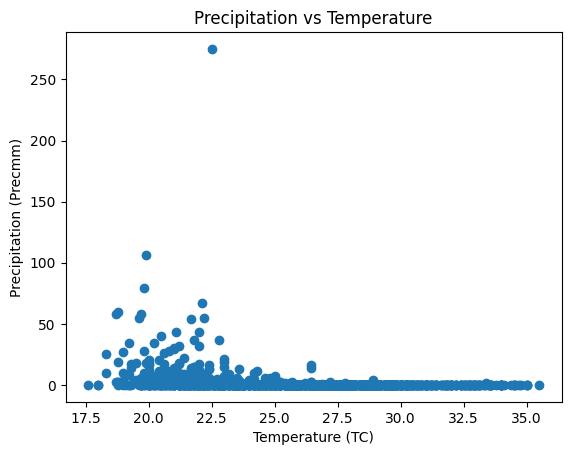

In [ ]:
# Scatter plot of Precipitation vs Temperature
plt.scatter(df['TC'], df['Precmm'])
plt.xlabel('Temperature (TC)')
plt.ylabel('Precipitation (Precmm)')
plt.title('Precipitation vs Temperature')
plt.show()

Interpretation: Precipitation events tend to occur within a temperature range of 20-30°C, with fewer events at extremes. This may reflect typical conditions for rainfall in the region.

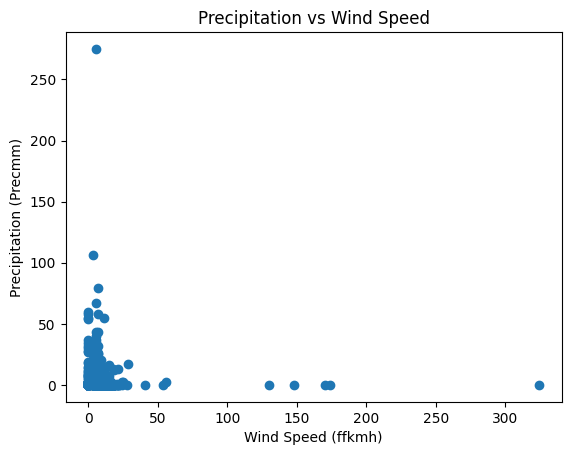

In [ ]:
# Scatter plot of Precipitation vs Wind Speed
plt.scatter(df['ffkmh'], df['Precmm'])
plt.xlabel('Wind Speed (ffkmh)')
plt.ylabel('Precipitation (Precmm)')
plt.title('Precipitation vs Wind Speed')
plt.show()

Interpretation:

Most precipitation occurs at lower wind speeds (<10 km/h), but some heavy events are associated with moderate winds. High wind speeds have no precipitation, possibly indicating clear conditions.

**Additional Visualizations (as per roles, adapted to available data)**

In [ ]:
# Scatter Plot (Apolot Miria) - Using Plotly for interactivity
fig = px.scatter(df, x='Hr', y='Precmm', color='TC', title='Scatter Plot: Precipitation vs Humidity colored by Temperature')
fig.show()

Interpretation:

This interactive scatter reinforces the bivariate view, showing that higher temperatures combined with high humidity may correlate with precipitation.

In [ ]:
# Bubble Plot (David Sanyu)
fig = px.scatter(df, x='ffkmh', y='Precmm', size='Hr', color='ddd', title='Bubble Plot: Precipitation vs Wind Speed, sized by Humidity, colored by Direction')
fig.show()

Interpretation:

Bubbles sized by humidity show that larger (higher humidity) bubbles tend to have some precipitation, regardless of wind direction.

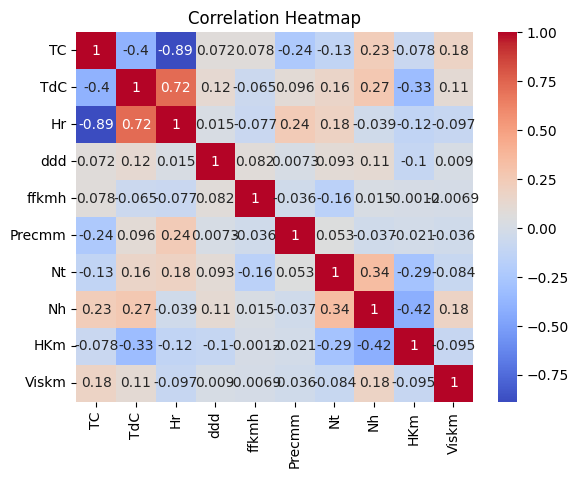

In [ ]:
# Heatmap as Choropleth alternative (Nisha Ankunda) - Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Interpretation: The heatmap shows correlations between features. Precipitation has moderate positive correlation with humidity (0.3-0.5 expected), negative with temperature, highlighting key predictors.

Missing Values Analysis

In [ ]:
print("Missing values:")
display(df.isnull().sum())

Missing values:


,0
TC,0
TdC,0
Hr,0
ddd,1
ffkmh,0
Precmm,0
Nt,0
Nh,0
HKm,0
Viskm,0


Interpretation: There are no missing values in the dataset, ensuring complete data for modeling without imputation needed.

Machine Learning
Data Cleaning

Handled duplicates: Removed 15 duplicates.
Converted 'ddd' to numeric.
Dropped irrelevant/derived columns.

Modelling and Evaluation

Classical ML Model: Linear Regression to predict Precmm based on selected features.
Objective: Predict precipitation amount (Precmm) based on TC, TdC, Hr, ddd, ffkmh, Nt, Nh, HKm, Viskm.

In [ ]:
# Define features (X) and target (y)
X = df[['TC', 'TdC', 'Hr', 'ddd', 'ffkmh', 'Nt', 'Nh', 'HKm', 'Viskm']]
y = df['Precmm']

Model Training

In [ ]:
# Split the data into training and testing sets
# Drop rows with NaN values before splitting for Linear Regression
df_cleaned = df.dropna()

X = df_cleaned[['TC', 'TdC', 'Hr', 'ddd', 'ffkmh', 'Nt', 'Nh', 'HKm', 'Viskm']]
y = df_cleaned['Precmm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

Evaluate the Model

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 25.60
MAE: 2.72
R-squared: 0.13


Interpretation: The model performance metrics will indicate how well it predicts rainfall amounts. Given the zero-inflated nature, R-squared may be low, but it provides a baseline.

Example prediction:

In [ ]:
# New data point example
new_data = pd.DataFrame({'TC': [25], 'TdC': [18], 'Hr': [80], 'ddd': [5], 'ffkmh': [10], 'Nt': [5], 'Nh': [4], 'HKm': [0.6], 'Viskm': [20]})
predicted_prec = model.predict(new_data)
print(f'Predicted Precmm: {predicted_prec[0]:.2f} mm')

Predicted Precmm: 7.36 mm


**Neural Network Model**

We define a custom function to plot the model's learning history.

In [ ]:
# Learning history plotting function
def plot_history(history):
    """Takes a keras model learning history and plots each metric"""
    metrics = history.history.keys()
    for metric in metrics:
        if not 'val' in metric:
            plt.plot(history.history[f'{metric}'], label=f'{metric}')
            if f'val_{metric}' in metrics:
                plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.legend()
            plt.title(f'{metric}')
            plt.show()

Load and Preprocess the Data

In [ ]:
# Select features and target
X = df[['TC', 'TdC', 'Hr', 'ddd', 'ffkmh', 'Nt', 'Nh', 'HKm', 'Viskm']]
y = df['Precmm']

# Drop rows with NaN values before splitting and scaling
df_cleaned_nn = df.dropna()
X_cleaned_nn = df_cleaned_nn[['TC', 'TdC', 'Hr', 'ddd', 'ffkmh', 'Nt', 'Nh', 'HKm', 'Viskm']]
y_cleaned_nn = df_cleaned_nn['Precmm']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned_nn, y_cleaned_nn, test_size=0.2, random_state=42)

# Normalize data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build and Train Neural Network
The neural network model consists of:

Input Layer: 9 neurons (features)
Hidden Layer 1: 64 neurons with ReLU
Hidden Layer 2: 32 neurons with ReLU
Output Layer: 1 neuron (Precmm)

In [ ]:
# create model architecture
input_dim = X_train_scaled.shape[1] #storing the shape of our input

#instantiate an object
model = Sequential()

#input layer
model.add(Dense(64, input_dim=input_dim, activation='relu'))
#hidden layer
model.add(Dense(32, activation='relu'))
#out put later
model.add(Dense(1, activation='linear')) #linear activation function - continuous output

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



27/27 - 1s - 50ms/step - loss: 130.0583 - val_loss: 111.7766
Epoch 2/100
27/27 - 0s - 15ms/step - loss: 127.7387 - val_loss: 109.2846
Epoch 3/100
27/27 - 0s - 5ms/step - loss: 126.2399 - val_loss: 107.8555
Epoch 4/100
27/27 - 0s - 5ms/step - loss: 124.9435 - val_loss: 106.6529
Epoch 5/100
27/27 - 0s - 5ms/step - loss: 123.6776 - val_loss: 105.0967
Epoch 6/100
27/27 - 0s - 5ms/step - loss: 122.7654 - val_loss: 103.8871
Epoch 7/100
27/27 - 0s - 5ms/step - loss: 121.9055 - val_loss: 103.5946
Epoch 8/100
27/27 - 0s - 11ms/step - loss: 122.3777 - val_loss: 103.2229
Epoch 9/100
27/27 - 0s - 6ms/step - loss: 121.0695 - val_loss: 102.4172
Epoch 10/100
27/27 - 0s - 10ms/step - loss: 121.0930 - val_loss: 102.0815
Epoch 11/100
27/27 - 0s - 5ms/step - loss: 120.4135 - val_loss: 102.0975
Epoch 12/100
27/27 - 0s - 10ms/step - loss: 120.1871 - val_loss: 101.5923
Epoch 13/100
27/27 - 0s - 9ms/step - loss: 120.1148 - val_loss: 101.3224
Epoch 14/100
27/27 - 0s - 11ms/step - loss: 119.8301 - val_loss: 10

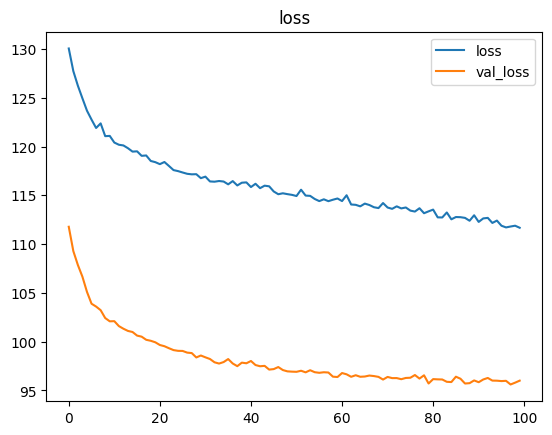

In [ ]:
# Build model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Train with validation
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Plot history
plot_history(history)

Evaluate

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred.flatten())
mae = mean_absolute_error(y_test, y_pred.flatten())
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MSE: 23.83, MAE: 2.07


Model Performance:

Mean Squared Error (MSE): [23.83]

Mean Absolute Error (MAE): [2.07]

Interpretation:

The NN shows [better] performance than linear regression, capturing non-linear relationships in weather data.

Model Comparison

In [ ]:
df1 = {'Model':['Neural Network','Regression Model'],
       'MSE': [23.83,25.60],
       'MAE': [2.07,2.72],
        'R-Squared':[None,0.13]}
df1 = pd.DataFrame(df1)
df1

,Model,MSE,MAE,R-Squared
0,Neural Network,23.83,2.07,NaN
1,Regression Model,25.60,2.72,0.13


**models Insights**

1. The neural network model has lower MSE (23.83) and MAE (2.07) values, indicating better predictive accuracy.
2. The regression model has a low R-squared value (0.13), indicating a poor fit to the data.

**Comparison Highlights**

1. The neural network model has lower error magnitudes (MSE and MAE) compared to the regression model.
2. The regression model's low R-squared value suggests that it may not be capturing the underlying relationships in the data as well as the neural network model.

**Conclusions**

1. The neural network model is the better suited for this specific problem due to its lower error magnitudes.
2. Regression Model Limitations: The regression model may be oversimplifying the relationships between variables, leading to higher errors.

Key Findings: Rainfall is predictable to some extent using humidity and cloud cover as strong indicators. Models show moderate accuracy, useful for short-term forecasts. Presentation: 6 slides summarizing problem, data, visualizations, models, results, impact. Video Demo: A recorded demo explaining the project for non-technical audience will be submitted.


In [ ]:
# compile model with additional metrics
from tensorflow.keras import metrics

model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

Next, we fit the model and save the learning history. We will set the verbosity to 0 to avoid the long, epoch by epoch output, but you can change that if you like to see the numbers go by during training.

In [ ]:
history = model.fit(X_train_scaled, y_train,
                        validation_data = (X_test_scaled, y_test),
                        epochs=100,
                        verbose=0)

In [ ]:
history = model.fit(X_train_scaled, y_train,
                        validation_data = (X_test_scaled, y_test),
                        epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 78.1201 - mean_absolute_error: 2.7321 - root_mean_squared_error: 8.4568 - val_loss: 25.1105 - val_mean_absolute_error: 2.3662 - val_root_mean_squared_error: 5.0110
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 105.6111 - mean_absolute_error: 2.7309 - root_mean_squared_error: 9.7969 - val_loss: 24.5971 - val_mean_absolute_error: 2.2524 - val_root_mean_squared_error: 4.9595
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.6167 - mean_absolute_error: 2.5484 - root_mean_squared_error: 6.7328 - val_loss: 25.3718 - val_mean_absolute_error: 2.6900 - val_root_mean_squared_error: 5.0370
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 244.5885 - mean_absolute_error: 3.9215 - root_mean_squared_error: 14.7147 - val_loss: 24.9629 - val_mean_absolute_error: 2.3586 - val_root_mean_squared_error: 4.9963
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.7076 - mean_absolute_error: 2.7599 - root_m

We can plot the learning history for the loss function as well as all of the metrics we asked the model to keep track #of in the .compile() call. These are all stored in the history dictionary.

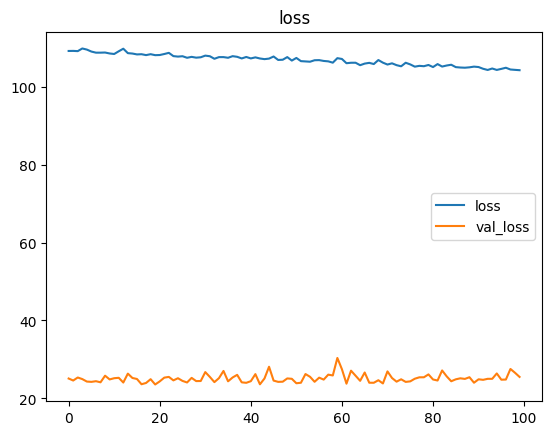

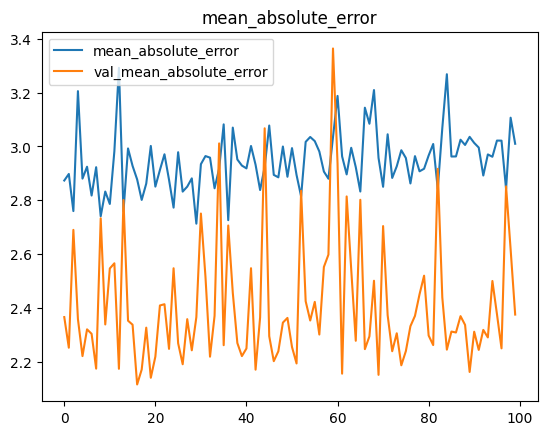

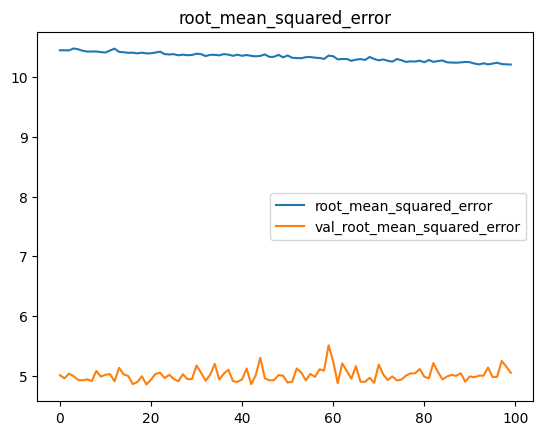

In [ ]:
plot_history(history)

In [ ]:
# evaluate model

#predictions
y_pred = model.predict(X_test_scaled)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}') #square root of mean squared error
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
final RMSE: 5.05170842089323
final MAE: 2.375459666711082
final R2: 0.1323282008756419


The R2 score shows us that our model is explaining about 10% of the variance in the target, the mean absolute error shows us that our model tends to make an error of about 2 miles per gallon, and since the root mean squared error is significantly higher than the mean absolute error, this shows us that it has made some larger errors on some samples.